### **Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **Getting the Data**

In [2]:
from data import get_and_preprocess_data
from binance import Client
from secret import KEY, SECRET
from datetime import datetime

data = get_and_preprocess_data(binance_client=Client(KEY, SECRET), 
                                start='2023-01-01',
                                end=datetime.today().strftime('%Y-%m-%d'),
                                symbol='BTCUSDT', 
                                interval=Client.KLINE_INTERVAL_1DAY, 
                                save=True, 
                                dir='data')
data

File already exists.
Timeframe ok. 
Returning already existing file.


,Timestamp,Open,High,Low,Close,Volume
0,2023-01-01,16541.77,16628.00,16499.01,16616.75,96925.41374
1,2023-01-02,16617.17,16799.23,16548.70,16672.87,121888.57191
2,2023-01-03,16672.78,16778.40,16605.28,16675.18,159541.53733
3,2023-01-04,16675.65,16991.87,16652.66,16850.36,220362.18862
4,2023-01-05,16850.36,16879.82,16753.00,16831.85,163473.56641
...,...,...,...,...,...,...
284,2023-10-12,26875.52,26947.04,26555.00,26759.63,23428.64112
285,2023-10-13,26759.63,27130.00,26685.00,26862.00,24115.76499
286,2023-10-14,26862.00,26989.58,26789.00,26852.48,10417.25576
287,2023-10-15,26852.48,27293.33,26808.25,27154.15,15274.69170


### **Initializing TradingEnvironment**

In [3]:
import environment
from environment import TradingEnvironment
from environment import PositionType

import importlib
importlib.reload(environment)

env = TradingEnvironment(data=data,
                         initial_balance=500000,
                         transaction_fee=10)

### **TradingEnvironment Testing Loop**

In [4]:
np.random.seed(42)

balances = []
portfolios = []
positions = []
for i in range(len(data)):
    action = np.random.choice([-1, 0, 0, 0, 0, 0, 0, 0, 1])
    volume = np.random.choice(range(6))+1

    game_over, balance, position = env.step(action, volume)
    if position.name != PositionType.HOLD.name:
        print(f"Date: {data['Timestamp'].iloc[i]}\n")

    balances.append(balance)
    portfolios.append(env.portfolio_value)
    positions.append(position)
    
    if game_over:
        break

Opened new LONG position:
Volume: 1
Purchase Price: 17943.26
Cost: 17943.26
Date: 2023-01-12

Bought more LONG position:
Additional Volume: 3
Updated Purchase Price: 20200.385
Cost: 62858.28
Date: 2023-01-15

Bought more LONG position:
Additional Volume: 2
Updated Purchase Price: 20511.02
Cost: 42264.58
Date: 2023-01-18

Bought more LONG position:
Additional Volume: 2
Updated Purchase Price: 21049.765
Cost: 45332.0
Date: 2023-01-21

Sold 8 shares of LONG position for 23060.42.
Total Transaction Profit: 8042.619999999995
Date: 2023-01-26

Bought more LONG position:
Additional Volume: 6
Updated Purchase Price: 22416.502
Cost: 139965.96
Date: 2023-02-05

Bought more LONG position:
Additional Volume: 4
Updated Purchase Price: 22572.315714285716
Cost: 91847.4
Date: 2023-02-09

Bought more LONG position:
Additional Volume: 5
Updated Purchase Price: 22368.50368421053
Cost: 108989.15000000001
Date: 2023-02-10

Sold 19 shares of LONG position for 21625.19.
Total Transaction Profit: -743.3136842

### **Visualization**

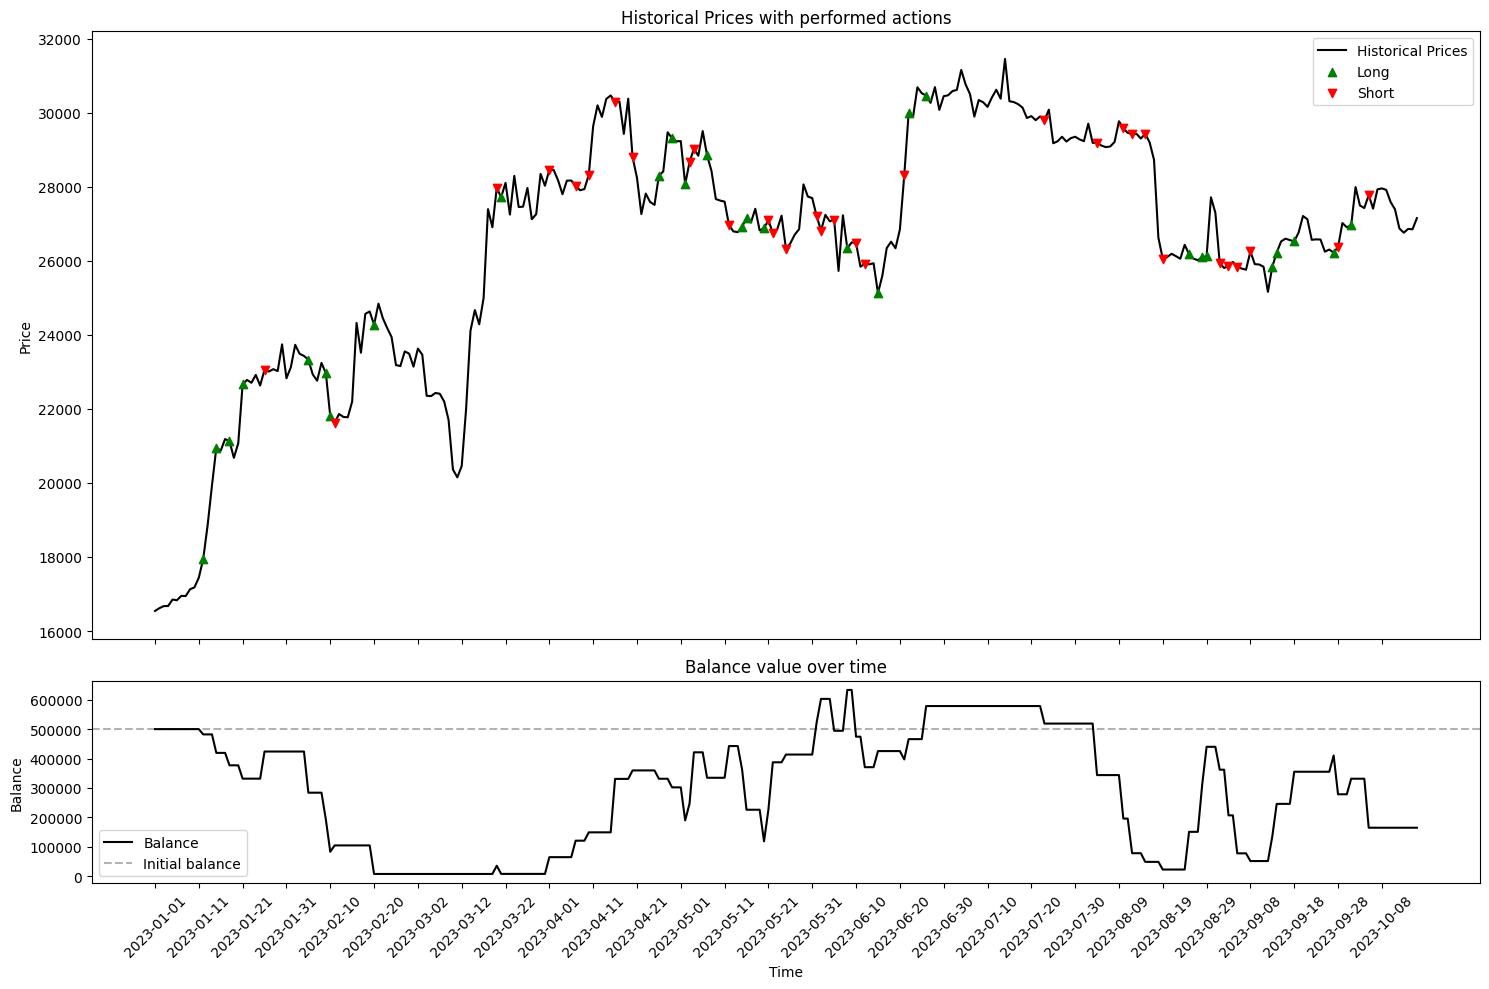

In [5]:
from environment import PositionType

# Initialize a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# First subplot
# Plot the historical prices
ax1.plot(data['Timestamp'], data['Open'], label='Historical Prices', color='black', zorder=1)

# Counter to inclued only 1 value in legend
long_positions = 0
short_positions = 0

# Add markers for buy and sell transactions
for i, position in enumerate(positions):
    if position == PositionType.LONG:
        long_positions += 1
        color, marker, label, add_legend = 'green', '^', 'Long', long_positions == 1
    elif position == PositionType.SHORT:
        short_positions += 1
        color, marker, label, add_legend = 'red', 'v', 'Short', short_positions == 1
    else:
        continue  # Skip if position is not Long or Short

    ax1.scatter(data['Timestamp'][i], 
                data['Open'][i], 
                color=color, 
                marker=marker, 
                label=label if add_legend==True else '', 
                clip_on=False, 
                zorder=2)

# Set labels and title
ax1.set_title('Historical Prices with performed actions')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

# Second subplot
# Plot the balance value on the second subplot
ax2.plot(data['Timestamp'], balances, color='black', label='Balance')

# Horizontal line for balance
ax2.axhline(y=env.initial_balance, color='black', linestyle='--', alpha=0.3, label='Initial balance')

# Set labels and title for the second subplot
ax2.set_title('Balance value over time')
ax2.set_ylabel('Balance')
ax2.set_xlabel('Time')
ax2.legend(loc='best')

# Rotate x-axis labels and display every 10th label
for label in ax2.get_xticklabels():
    label.set_rotation(45)
ax2.set_xticks(ax2.get_xticks()[::10])

plt.tight_layout() 

plt.show()